In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

## REPORTE 3 

* Sofía Dager
* 20201095

### PARTE 1: REPORTE



La pregunta de investigación del artículo es ¿cómo ha afectado la cuarentena desencadenada por el COVID-19 a la economía del país? El artículo busca explicar cómo es que esta cuarentena ha afectado a diferentes sectores como hoteles, restaurantes, producción de alimentos, bienes y servicios indispensables, etc.  

Las mayores fortalezas del documento son la presentación de gráficos que ayudan mucho al lector a entender de manera visual lo que los autores quieren transmitir. Además, el texto está escrito, en su mayoría, en un lenguaje comprensible para los lectores aunque estos no sean especialistas en economía. Por otro lado, los modelos presentados por los autores ayudan a entender el movimiento en la economía, además, las fórmulas  y cada variable están bien explicadas para la fácil lectura y entendimiento del lector.

Una debilidad que se le puede encontrar al artículo es que aunque las fórmulas están bien explicadas, sería bueno que despúes de las ecuaciones se explique con un poco más de detenimiento cómo es que esto afecta en la realidad. Tal vez utilizar un par de ejemplos prácticos o reales para poder tener tanto la teoría como su efecto en la realidad del país durante el periodo de cuarentena. 

El documento contribuye en el conocimiento sobre la pregunta. Pues sí responde la pregunta principal de investigación a través de los modelos macroeonómicos presentados. Además, en la conclusión se explica un poco más a detalle todo lo explicado a través de fórmulas y gráficos anteriormente. Sin embargo, considero que sería importante poner una breve xplicación luego de cada gran ecuación o gráfico para así poder entender de mejor manera, sin la necesidad de tener demasiados conocimientos macroeconómicos.



### PARTE 2: CÓDIGO

1. 
El BCR puede dar diferentes medidas monetarias en el país. Algunos ejemplos de estas son las medidas expansivas, es decir, cuando hay más gasto público de parte del gobierno. Pero también pueden darse las medidas contractivas, las que hacen que el gasto de gobierno se reduzca. Ambas afectan a la población. Otros instrumento es el incremento o disminución de la tasa de tributación. Esto afecta directamente al consumo de las familias. En el primer caso, tendrían menos dinero para consumir en sus canastas familiares, mientras que en el segundo tienen más oportunidades para utilizar ese dinero; sea en ahorros, compras, etc.

##### 2. OFERTA REAL 

La fórmula de la oferta real de dinero es:

$$ Ms = \frac{M_o}{p} $$

donde M_o es:

$$ M_o = P(kY - jr) $$ 

P = precio

Y = ingreso total



##### 2. DEMANDA REAL 

La fórmula de la demanda real de dinero es:

$$ M^d = L1 + L2 $$

Donde...

$$ L1 = k * Y $$

$$ L2 = -j*i $$

Por lo tanto...

$$ M^d = kY - ji $$

j = constante de cambio en la demanda de dinero (tomar en cuenta que en esta fórmula es negativa)

k = propensión marginal a demandar dinero



#### EQUILIBRIO DEL MERCADO DE DINERO

Ms = Md


entonces, debido a las fórmulas presentadas antes, el equilibrio quedaria como:

$$ \frac{M^s}{P} = kY - jr $$



### Gráfico

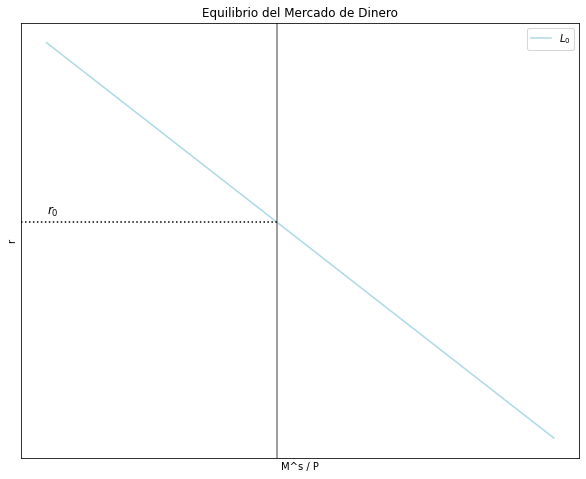

In [74]:
# Parametros

r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)

    # Ecuación

def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)


    # Equilibrio 

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set(title="Equilibrio del Mercado de Dinero", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Ms_MD, label= '$L_0$', color = 'lightblue')

ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "black")
ax1.text(0, 89, "$r_0$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

### Pregunta 2


In [68]:
# a)

    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
k = 0.5

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

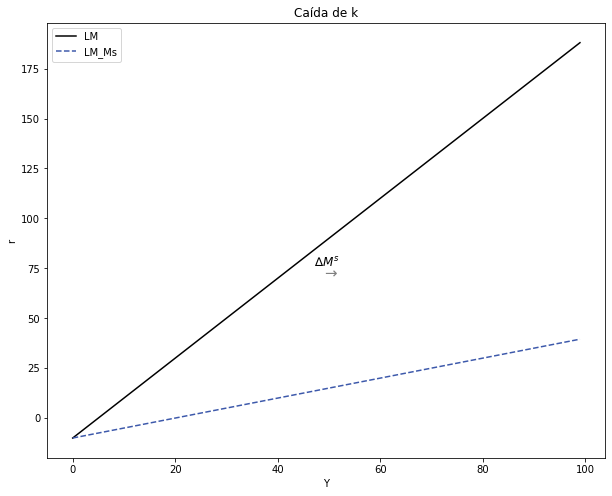

In [69]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#3D59AB', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Caída de k", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

En el caso de que "k" disminuya, entonces disminuirá la pendiente

In [70]:
# b)

    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
Ms = 50
# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

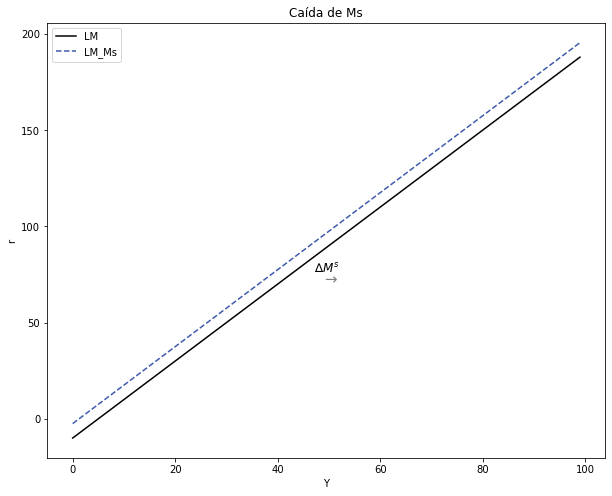

In [71]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#3D59AB', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Caída de Ms", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

Al caer Ms, cae la oferta. Esto puede ser producido debido a la caída del precio de los productos 

### Pregunta 3


#### 1. DERIVACIÓN LM


Para la derivación de la Curva LM, se debe hacer desde el equilibrio del Mercado Monetario

Fórmula del equilibrio del Mercado Monetario


$$ M^d = M^s $$ 

Para encontrarla, necesitamos otras fórmulas importantes


$$ M^d = kY - ji $$

$$ M^s = \frac{M_o}{p} $$

$$ M_o = P(kY - jr) $$ 


#### $$ \frac{M^s}{P} = kY - ji $$

#### importante, i = r




No habría una gran diferencia entre la tasa de interés nominal $(i)$ y la real $(r)$, porque a corto plazo el nivel de precios es fijo, por lo que la inflación esperada sería 0

Entonces la ecuación del equilibrio en el mercado monetario sería:

$$ \frac{M^s}{P} = kY - jr $$


#### GRÁFICO

In [17]:
# Parameters

r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)

    # Ecuación

def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)

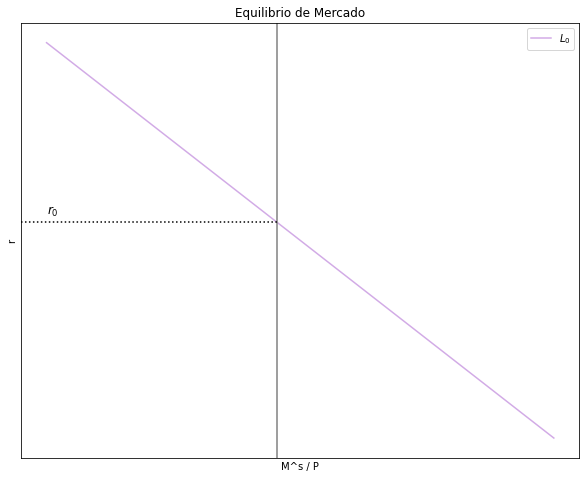

In [18]:
  # Equilibrio en el mercado de dinero

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set(title="Equilibrio de Mercado", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Ms_MD, label= '$L_0$', color = '#D2ABE6')

ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "black")
ax1.text(0, 89, "$r_0$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

### 2. LA CURVA LM


En base a la ecuación de equilibrio, la curva LM se da en función de r (tasa de interés) :

$$ r = -\frac{1}{j}\frac{M_o^s}{P_o} + \frac{k}{j}Y $$

In [4]:
# Parametros
Y_size = 100

k = 10
j = 10                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)


# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#### GRÁFICO

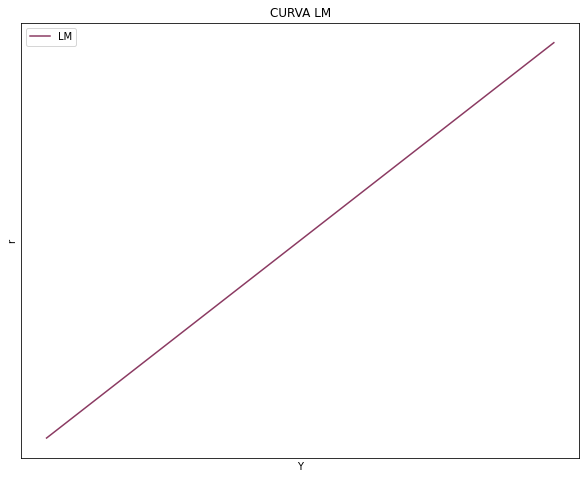

In [6]:
# Dimensiones 
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Curvas a graficar
ax.plot(Y, i, label="LM", color = '#8B3A62')

# Título y leyenda
ax.set(title="CURVA LM", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

### DERIVACIÓN DE LA CURVA LM EN BASE AL EQUILIBRIO DEL MERCADO MONETARIO


In [15]:
#equilibrio
r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)


def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD (k, j, P, r, Y)

In [21]:
#nuevos valores de Y
Y1 = 40

def Ms_MD_Y1(k, j, P, r, Y1):
    
    Ms_MD = P*(k*Y1 - j*r)
    return Ms_MD

Ms_Y1 = Ms_MD_Y1(k, j, P, r, Y1)


Y2 = 20

def Ms_MD_Y2(k, j, P, r, Y2):
    Ms_MD = P*(k*Y2 - j*r)
    return Ms_MD

Ms_Y2 = Ms_MD_Y2(k, j, P, r, Y2)



In [22]:
#Curva LM

    # Parameters
Y_size = 100

k = 0.5
j = 0.2                
P  = 10               
Ms = 30            

Y = np.arange(Y_size)


# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

### GRÁFICO

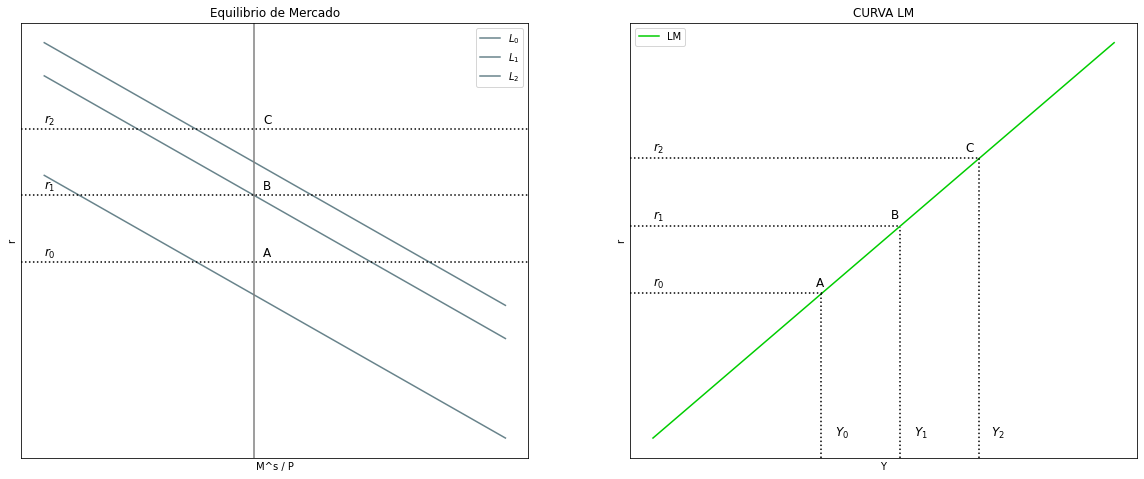

In [24]:
    # Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8)) 


#---------------------------------
    # Gráfico 1: Equilibrio en el mercado de dinero
    
ax1.set(title="Equilibrio de Mercado", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Y, Ms_MD, label= '$L_0$', color = '#68838B')
ax1.plot(Y, Ms_Y1, label= '$L_1$', color = '#68838B')
ax1.plot(Y, Ms_Y2, label= '$L_2$', color = '#68838B')
ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")

ax1.axhline(y=35, xmin= 0, xmax= 1, linestyle = ":", color = "black")
ax1.axhline(y=135, xmin= 0, xmax= 1, linestyle = ":", color = "black")
ax1.axhline(y=85, xmin= 0, xmax= 1, linestyle = ":", color = "black")

ax1.text(47, 139, "C", fontsize = 12, color = 'black')
ax1.text(47, 89, "B", fontsize = 12, color = 'black')
ax1.text(47, 39, "A", fontsize = 12, color = 'black')

ax1.text(0, 139, "$r_2$", fontsize = 12, color = 'black')
ax1.text(0, 89, "$r_1$", fontsize = 12, color = 'black')
ax1.text(0, 39, "$r_0$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()
 

#---------------------------------
    # Gráfico 2: Curva LM
    
ax2.set(title="CURVA LM", xlabel=r'Y', ylabel=r'r')
ax2.plot(Y, i, label="LM", color = '#00CD00')

ax2.axhline(y=160, xmin= 0, xmax= 0.69, linestyle = ":", color = "black")
ax2.axhline(y=118, xmin= 0, xmax= 0.53, linestyle = ":", color = "black")
ax2.axhline(y=76, xmin= 0, xmax= 0.38, linestyle = ":", color = "black")

ax2.text(67, 164, "C", fontsize = 12, color = 'black')
ax2.text(51, 122, "B", fontsize = 12, color = 'black')
ax2.text(35, 80, "A", fontsize = 12, color = 'black')

ax2.text(0, 164, "$r_2$", fontsize = 12, color = 'black')
ax2.text(0, 122, "$r_1$", fontsize = 12, color = 'black')
ax2.text(0, 80, "$r_0$", fontsize = 12, color = 'black')

ax2.text(72.5, -14, "$Y_2$", fontsize = 12, color = 'black')
ax2.text(56, -14, "$Y_1$", fontsize = 12, color = 'black')
ax2.text(39, -14, "$Y_0$", fontsize = 12, color = 'black')

ax2.axvline(x=70,  ymin= 0, ymax= 0.69, linestyle = ":", color = "black")
ax2.axvline(x=53,  ymin= 0, ymax= 0.53, linestyle = ":", color = "black")
ax2.axvline(x=36,  ymin= 0, ymax= 0.38, linestyle = ":", color = "black")

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.legend()

plt.show()

### Disminución en la Masa Monetaria 

In [65]:
# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
Ms = 50

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

### Gráfico


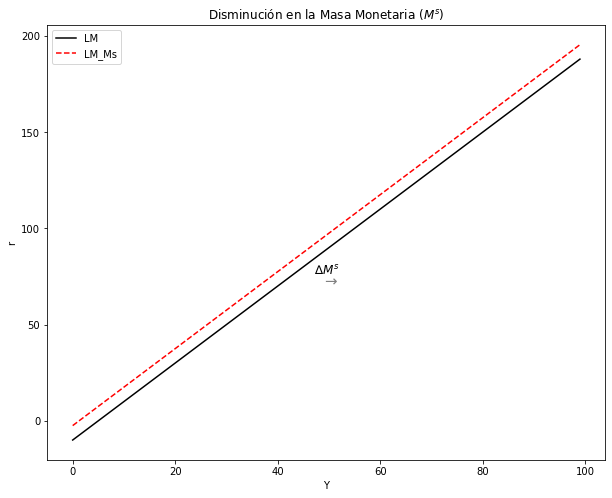

In [30]:
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = 'red', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Disminución en la Masa Monetaria $(M^s)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()


### Aumento de k

In [34]:
# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
k = 10

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

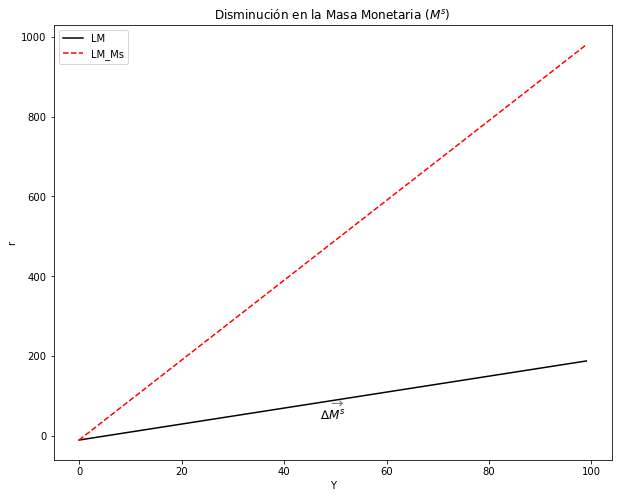

In [38]:
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = 'red', linestyle = 'dashed')

# Texto agregado
plt.text(47, 40, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Disminución en la Masa Monetaria $(M^s)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()